In [1]:
df1 = pd.read_pickle('data/df1.pkl')
print(df1.shape)
df1[:3]

(255884, 7)


,Substance,Sector,EDGAR Country Code,Country,year,val_mt,Continent
0,CO2,Agriculture,AFG,Afghanistan,1970,0.03,AS
1,CO2,Agriculture,AFG,Afghanistan,1971,0.03,AS
2,CO2,Agriculture,AFG,Afghanistan,1972,0.03,AS


In [2]:
df2 = pd.read_pickle('data/df2.pkl')
print(df2.shape)
df2[:3]

(11130, 13)


,EDGAR Country Code,Country,year,val_capita_ghg,val_capita_co2,Continent,val_gdp_ghg,val_gdp_co2,val_ghg,val_co2,population,gdp_gusd,gdp_cap
0,ABW,Aruba,1970,0.76,0.43,NA,NaN,NaN,0.05,0.03,"59,063.00",NaN,NaN
1,AFG,Afghanistan,1970,1.56,0.16,AS,NaN,NaN,17.34,1.73,"11,126,100.00",NaN,NaN
2,AGO,Angola,1970,2.97,1.32,AF,NaN,NaN,20.14,8.95,"6,776,380.00",NaN,NaN


In [3]:
list_cont = list(df1[~df1.Continent.isnull()].Continent.unique())

### EDA

In [4]:
plt.style.use('bmh')
fsize = (14,3.5)

#### plot 1

In [5]:
def get_plots1(feats_gr, feat):
    # plot1
    df_st = df1[df1.Substance == 'CO2'].groupby(feats_gr)[feat].sum().unstack().fillna(0)
    title = f'Fossil CO2 by {feats_gr[1]}'
    _, ax = plt.subplots(1,2, figsize = fsize, width_ratios=[1,1])

    p = df_st.plot(ax = ax[0], title = title, style = '-', legend = False, xlabel = '')

    df_st = df_st.apply(lambda x: x/sum(x), axis = 1)
    p = df_st.plot(ax = ax[1], title = title + ' (shares)', legend = False, xlabel = '')
    
    # p = df_st.pct_change(10).plot(ax = ax[2], title = '10-year percent change of ' + title, xlabel = '', style = '-')
    # p.hlines(y = 0, xmin = 1980, xmax = 2022, color = 'black', linestyles = '--')
    _ = p.legend(bbox_to_anchor=(1., 1.05))
    
    plt.tight_layout()
    plt.show()
    
    # plot2
    df_st = df1.groupby(feats_gr)[feat].sum().unstack().fillna(0)
    title = f'GHG by {feats_gr[1]}'
    _, ax = plt.subplots(1,2, figsize = fsize, width_ratios=[1,1])

    p = df_st.plot(ax = ax[0], title = title, style = '-', legend = False, xlabel = '')

    df_st = df_st.apply(lambda x: x/sum(x), axis = 1)
    p = df_st.plot(ax = ax[1], title = title + ' (shares)', legend = False, xlabel = '')
    
    # p = df_st.pct_change(10).plot(ax = ax[2], title = '10-year percent change of ' + title, xlabel = '', style = '-')
    # p.hlines(y = 0, xmin = 1980, xmax = 2022, color = 'black', linestyles = '--')
    _ = p.legend(bbox_to_anchor=(1., 1.05))
    
    plt.tight_layout()
    plt.show()
    
    # other
    # a = df_st.sum() / df_st.sum().sum()
    # display(a)
    # _ = a.plot(kind = 'pie', figsize = (2,2), )

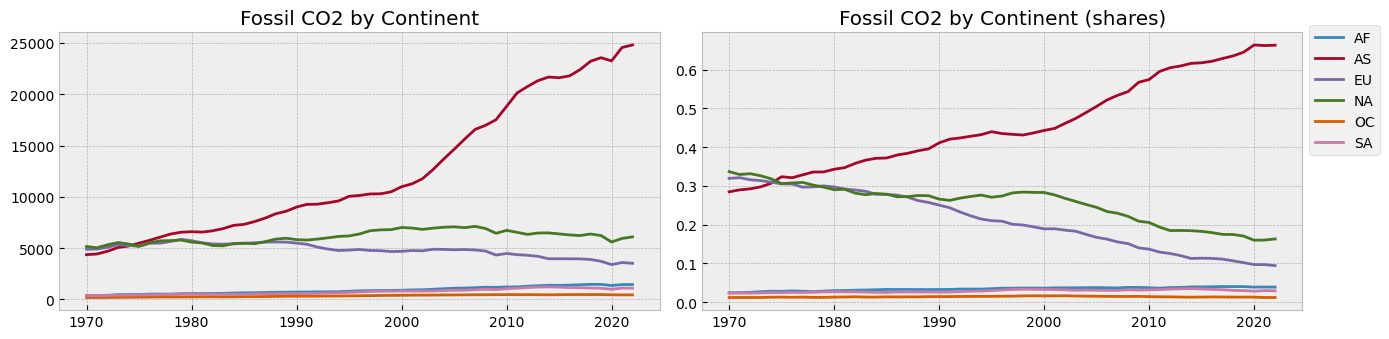

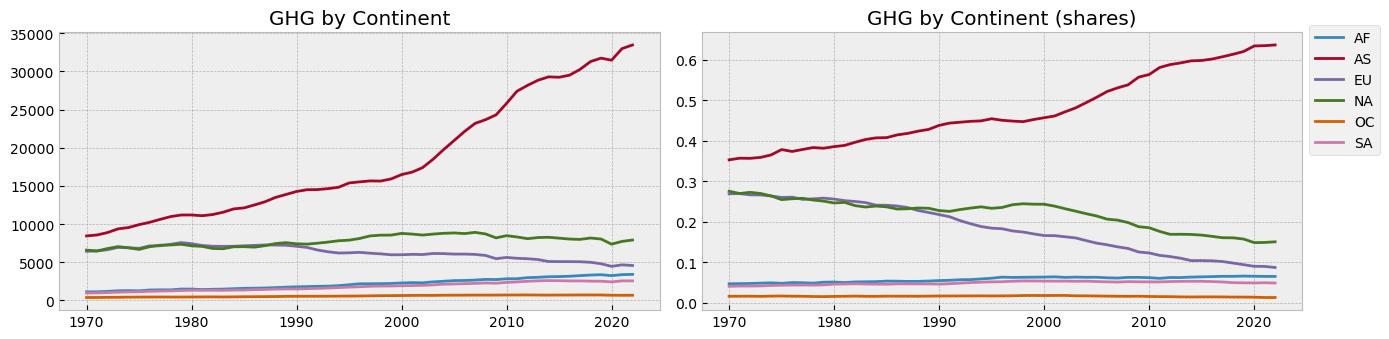

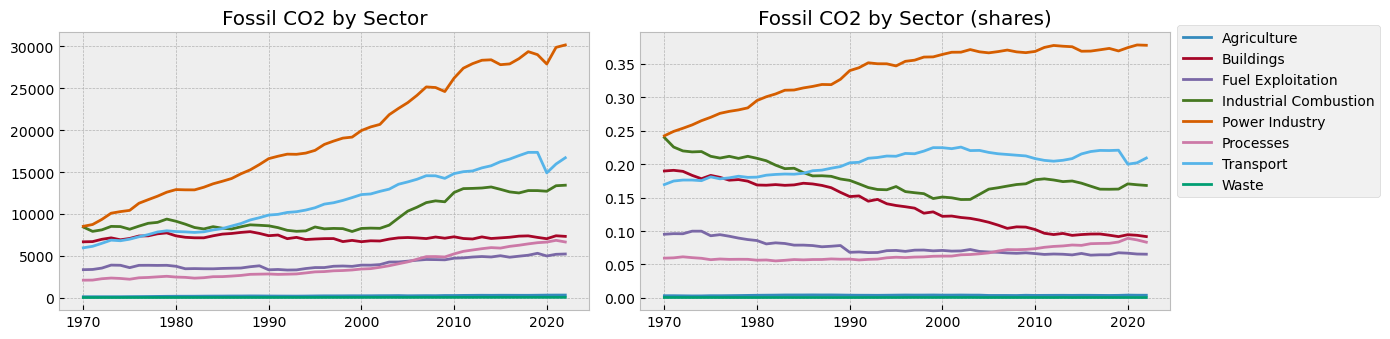

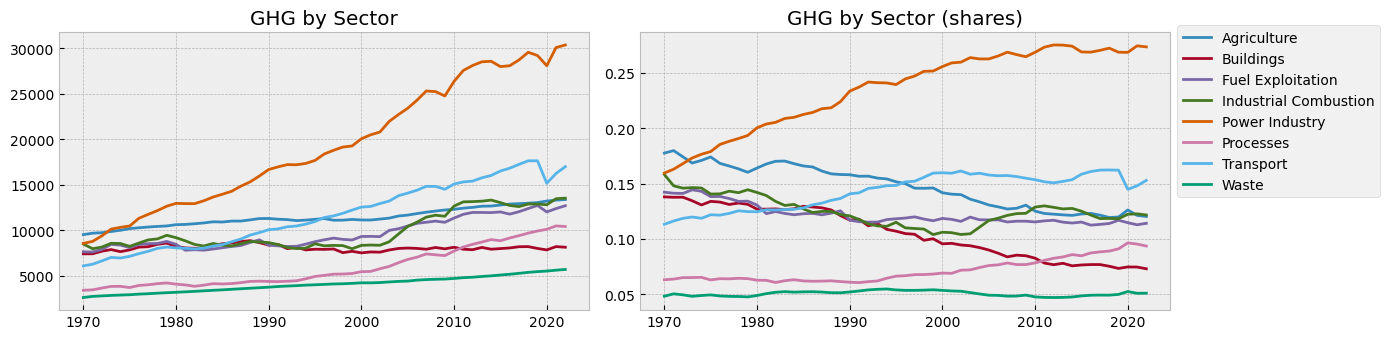

In [6]:
feats_gr = [
    'year',
    'Continent',
    'Sector',
]
for f in feats_gr[1:4]:
    feats_gr1 = ['year', f]
    feat = 'val_mt'
    get_plots1(feats_gr1, feat)

#### plot 2

In [7]:
def get_plots2(feats_gr, feat):
    # plot1
    df_st = df1[df1.Substance == 'CO2'].groupby(feats_gr)[feat].sum().unstack().fillna(0)
    title = f'Fossil CO2 by {feats_gr[1]}'
    _, ax = plt.subplots(1,2, figsize = fsize, width_ratios=[1,1])

    p = df_st.pct_change(1).plot(ax = ax[0], title = '1-year percent change of ' + title, xlabel = '', style = '-', legend = False)
    p.hlines(y = 0, xmin = 1970, xmax = 2022, color = 'black', linestyles = '--')
    
    p = df_st.pct_change(10).plot(ax = ax[1], title = '10-year percent change of ' + title, xlabel = '', style = '-', legend = True)
    p.hlines(y = 0, xmin = 1980, xmax = 2022, color = 'black', linestyles = '--')

    _ = p.legend(bbox_to_anchor=(1., 1.05))
    
    plt.tight_layout()
    plt.show()
    
    # plot2
    df_st = df1.groupby(feats_gr)[feat].sum().unstack().fillna(0)
    title = f'GHG by {feats_gr[1]}'
    _, ax = plt.subplots(1,2, figsize = fsize, width_ratios=[1,1])

    p = df_st.pct_change(1).plot(ax = ax[0], title = '1-year percent change of ' + title, xlabel = '', style = '-', legend = False)
    p.hlines(y = 0, xmin = 1970, xmax = 2022, color = 'black', linestyles = '--')
    
    p = df_st.pct_change(10).plot(ax = ax[1], title = '10-year percent change of ' + title, xlabel = '', style = '-', legend = True)
    p.hlines(y = 0, xmin = 1980, xmax = 2022, color = 'black', linestyles = '--')

    _ = p.legend(bbox_to_anchor=(1., 1.05))
    
    plt.tight_layout()
    plt.show()
    
    # other
    # a = df_st.sum() / df_st.sum().sum()
    # display(a)
    # _ = a.plot(kind = 'pie', figsize = (2,2), )

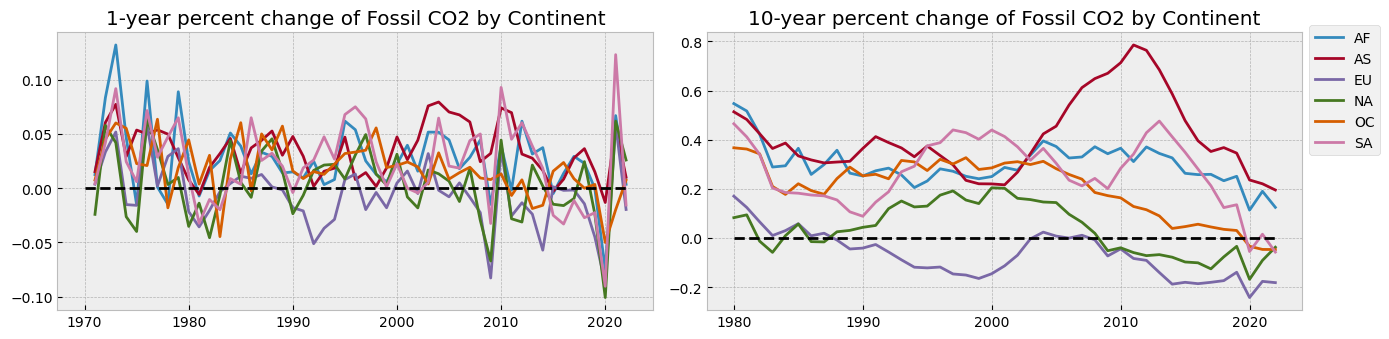

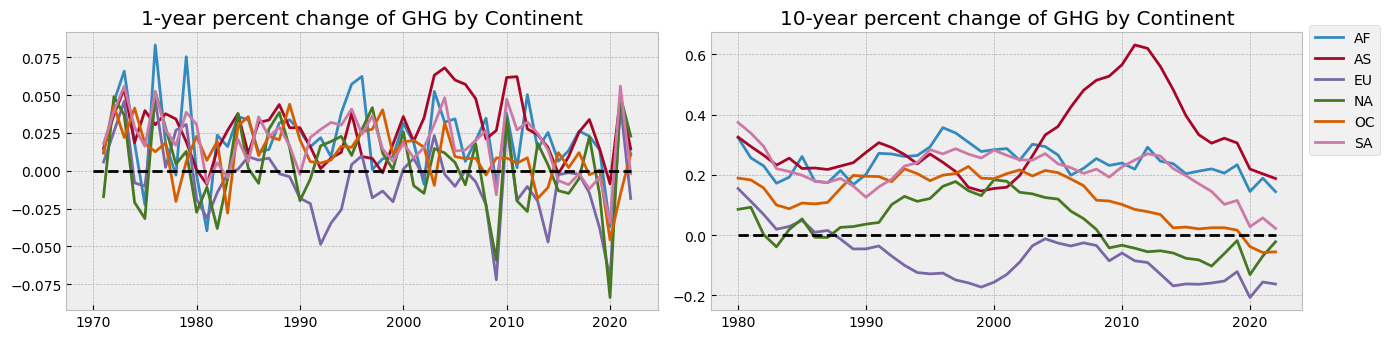

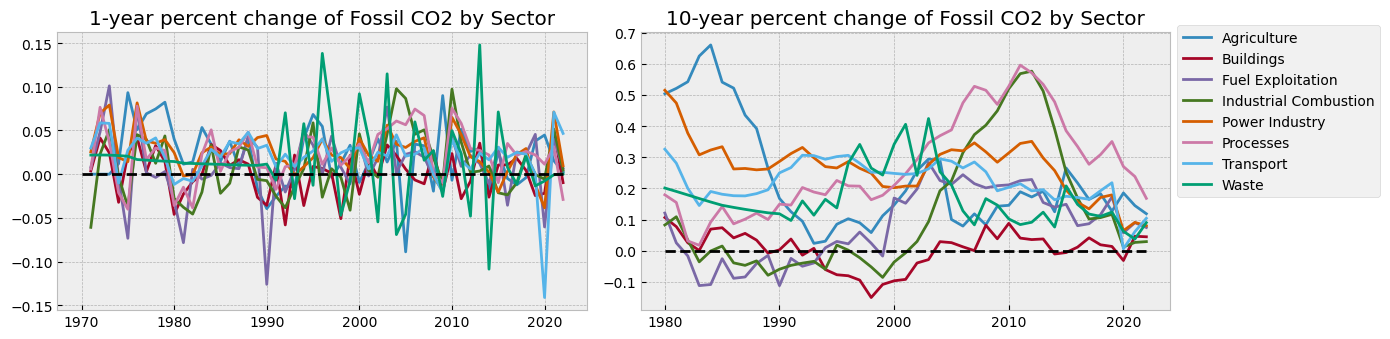

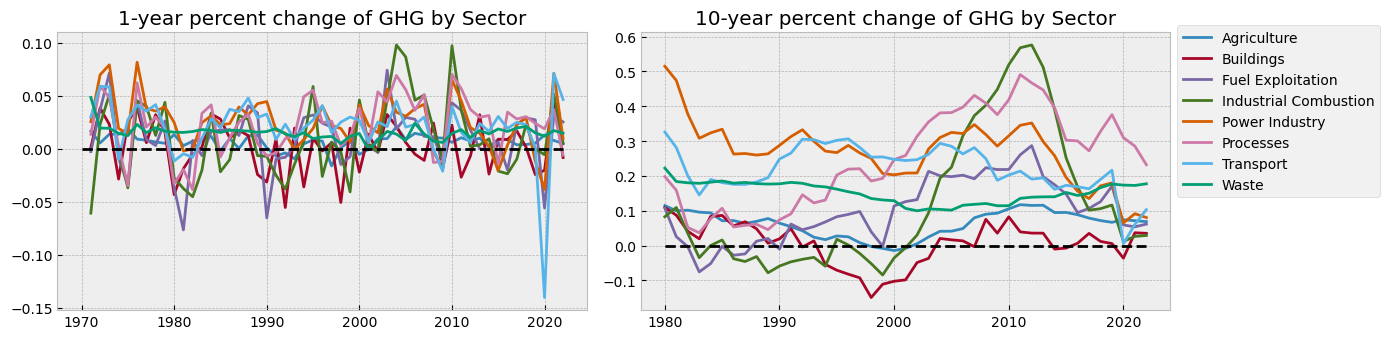

In [8]:
feats_gr = [
    'year',
    'Continent',
    'Sector',
]
for f in feats_gr[1:4]:
    feats_gr1 = ['year', f]
    feat = 'val_mt'
    get_plots2(feats_gr1, feat)

#### plot 3

In [9]:
def get_plots3(feats_gr, feat, title):
    _, ax = plt.subplots(1,2, figsize = (14,6))
    # plot1
    df_st = df1[df1.year < 2000].groupby(feats_gr)[feat].sum().unstack().fillna(0)
    df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
    p = df_st.plot(ax = ax[0], kind = 'bar', stacked = True, legend = False, title = title + ' (before 2000)', xlabel = '')
    # _ = p.legend(bbox_to_anchor=(1., 1.05))
    for c in p.containers:
        labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
        p.bar_label(c, labels=labels, label_type='center')
    
    # plot2
    df_st = df1[df1.year >= 2000].groupby(feats_gr)[feat].sum().unstack().fillna(0)
    df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
    p = df_st.plot(ax = ax[1], kind = 'bar', stacked = True, legend = True, title = title + ' (after 2000)', xlabel = '')
    _ = p.legend(bbox_to_anchor=(1., 1.05))
    for c in p.containers:
        labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
        p.bar_label(c, labels=labels, label_type='center')
        
    # plt.tight_layout()
    plt.show()

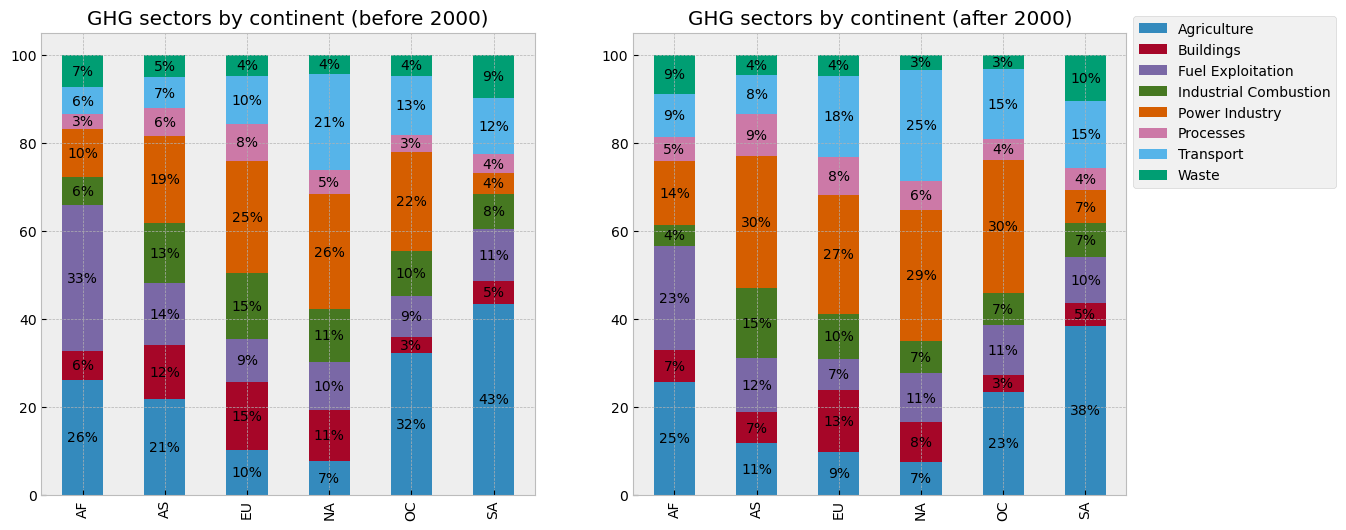

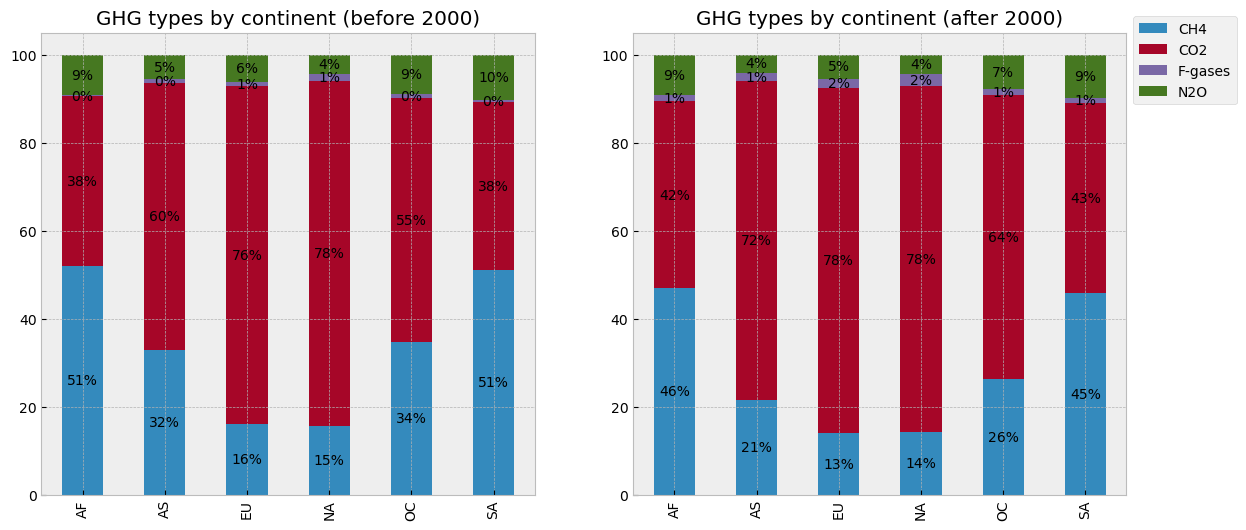

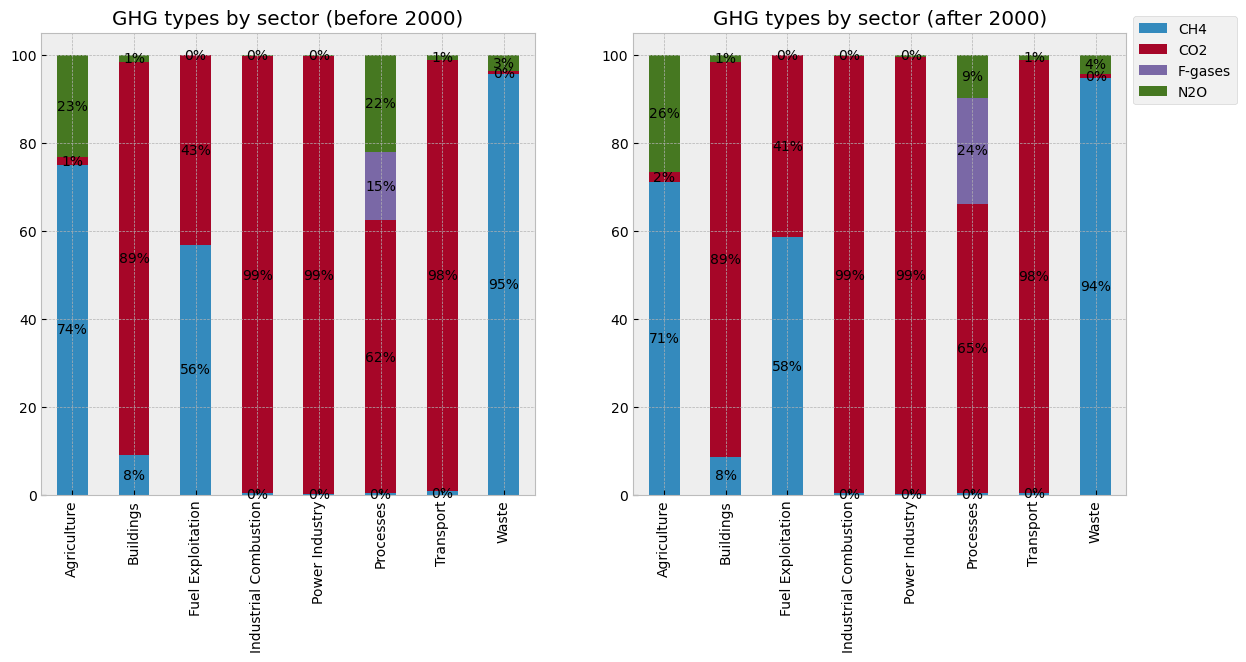

In [10]:
feats_gr = [
    'Continent',
    'Sector',
    'Substance',
]
feat = 'val_mt'

get_plots3([feats_gr[0], feats_gr[1]], feat, title = 'GHG sectors by continent')
get_plots3([feats_gr[0], feats_gr[2]], feat, title = 'GHG types by continent')
get_plots3([feats_gr[1], feats_gr[2]], feat, title = 'GHG types by sector')

### Correlations

#### corr 1

In [22]:
f0 = ~df1.Country.isin(['EU27','GLOBAL TOTAL'])
f1 = df1.year >= 1970
f2 = df1.Substance == 'CO2'

feat = 'val_mt'
feats_gr = ['Continent','Country']
df_st1 = df1[f0&f1].groupby(feats_gr)[feat].sum().reset_index()
df_st2 = df1[f0&f1&f2].groupby(feats_gr)[feat].sum().reset_index()

df_st = df_st1.merge(df_st2, on = feats_gr).set_index(feats_gr)
df_st = df_st/1000
df_st.columns = ['GHG','CO2']

print(df_st.shape)
df_st[:10]

(208, 2)


GHG  CO2
Continent Country                           
AF        Algeria                  8.99 4.81
          Angola                   2.81 0.90
          Benin                    0.42 0.14
          Botswana                 0.47 0.18
          Burkina Faso             0.88 0.08
          Burundi                  0.20 0.01
          Cabo Verde               0.03 0.02
          Cameroon                 1.49 0.28
          Central African Republic 0.43 0.01
          Chad                     1.61 0.03

In [23]:
for c in list_cont:
    print(c)
    display(df_st.loc[c].sort_values('CO2')[-5:])

AS


,GHG,CO2
Country,,
South Korea,23.25,19.89
India,104.24,56.47
Japan,67.11,59.70
Russia,127.71,97.13
China,366.29,264.61


EU


,GHG,CO2
Country,,
"Italy, San Marino and the Holy See",25.52,21.02
France and Monaco,29.34,21.39
Ukraine,31.41,25.07
United Kingdom,37.16,28.59
Germany,59.25,49.27


AF


,GHG,CO2
Country,,
Libya,4.72,2.20
Nigeria,17.93,4.67
Algeria,8.99,4.81
Egypt,10.89,6.88
South Africa,23.72,18.24


NA


,GHG,CO2
Country,,
Puerto Rico,1.32,1.18
Cuba,2.72,1.52
Mexico,29.65,18.29
Canada,34.30,26.30
United States,334.83,271.58


SA


,GHG,CO2
Country,,
Chile,4.39,2.67
Colombia,7.95,3.04
Venezuela,9.89,6.15
Argentina,15.96,7.03
Brazil,46.02,16.08


OC


,GHG,CO2
Country,,
Palau,0.11,0.10
New Caledonia,0.15,0.13
Papua New Guinea,0.31,0.17
New Zealand,4.02,1.45
Australia,25.76,16.39


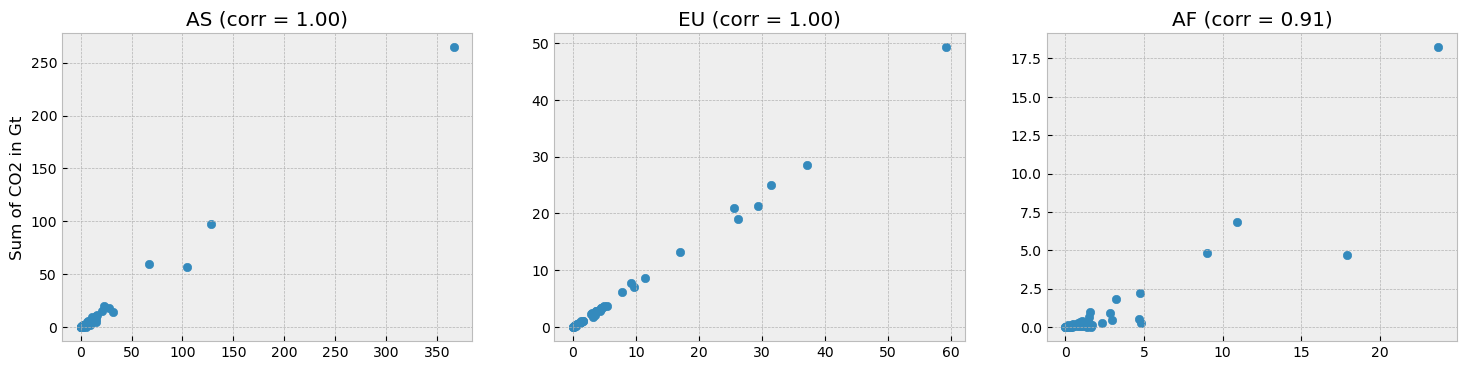

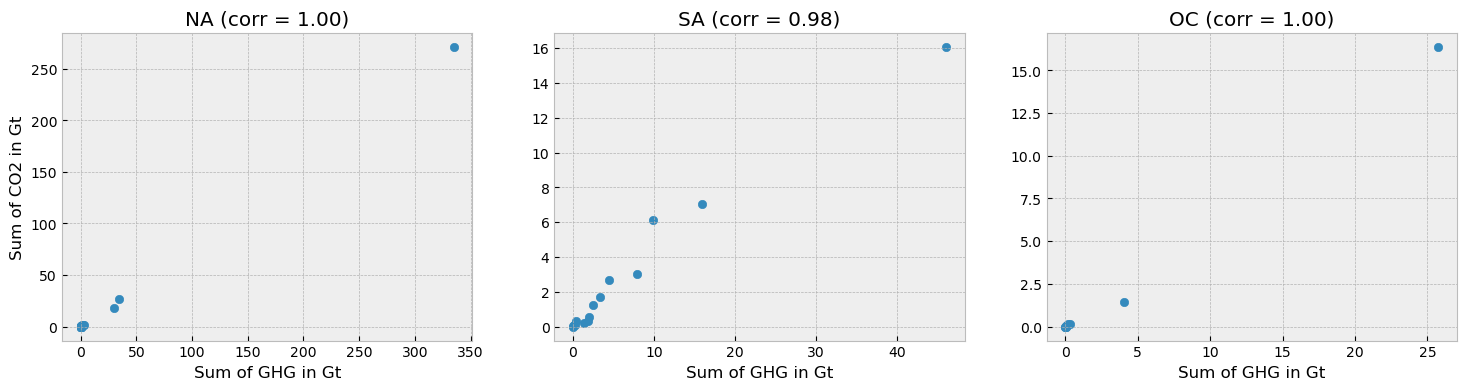

In [13]:
for i,c in enumerate(list_cont):
    if i%3 == 0:
        _,ax = plt.subplots(1,3, figsize = (18,4))
    df_st1 = df_st.loc[c]
    _ = ax[i%3].scatter(x = df_st1.iloc[:,0], y = df_st1.iloc[:,1])
    if i in [3,4,5]:
        ax[i%3].set_xlabel('Sum of GHG in Gt')
    if i in [0,3]:
        ax[i%3].set_ylabel('Sum of CO2 in Gt')
    cor = df_st1.corr().iloc[1,0]
    ax[i%3].set_title(f'{c} (corr = {cor:.2f})')

#### corr 2

In [24]:
f0 = ~df1.Country.isin(['EU27','GLOBAL TOTAL'])
f1 = df1.year >= 1970
f2 = df1.Substance == 'CO2'

feat = 'val_mt'
feats_gr = ['Continent','Sector']
df_st1 = df1[f0&f1].groupby(feats_gr)[feat].sum().reset_index()
df_st2 = df1[f0&f1&f2].groupby(feats_gr)[feat].sum().reset_index()

df_st = df_st1.merge(df_st2, on = feats_gr).set_index(feats_gr)
df_st = df_st/1000
df_st.columns = ['GHG','CO2']

print(df_st.shape)
df_st[:10]

(48, 2)


GHG   CO2
Continent Sector                            
AF        Agriculture            29.59  0.22
          Buildings               7.91  3.87
          Fuel Exploitation      31.78  9.21
          Industrial Combustion   6.35  6.27
          Power Industry         14.87 14.81
          Processes               5.29  3.33
          Transport               9.44  9.25
          Waste                   9.59  0.00
AS        Agriculture           149.30  3.15
          Buildings              87.41 74.09

In [27]:
for c in list_cont:
    print(c)
    display(df_st.loc[c].sort_values('CO2')[-15:])

AS


,GHG,CO2
Sector,,
Waste,46.99,0.32
Agriculture,149.30,3.15
Fuel Exploitation,125.27,47.81
Processes,79.96,58.92
Buildings,87.41,74.09
Transport,78.60,76.84
Industrial Combustion,144.34,143.45
Power Industry,251.63,250.38


EU


,GHG,CO2
Sector,,
Waste,16.17,0.31
Agriculture,32.92,0.93
Processes,28.08,16.78
Fuel Exploitation,28.97,16.81
Industrial Combustion,43.84,43.64
Transport,45.44,44.70
Buildings,49.44,47.41
Power Industry,86.30,85.82


AF


,GHG,CO2
Sector,,
Waste,9.59,0.00
Agriculture,29.59,0.22
Processes,5.29,3.33
Buildings,7.91,3.87
Industrial Combustion,6.35,6.27
Fuel Exploitation,31.78,9.21
Transport,9.44,9.25
Power Industry,14.87,14.81


NA


,GHG,CO2
Sector,,
Waste,16.81,0.01
Agriculture,30.89,0.58
Processes,25.24,11.02
Fuel Exploitation,45.43,22.48
Industrial Combustion,40.36,40.08
Buildings,42.82,41.48
Transport,95.68,93.81
Power Industry,114.29,113.66


SA


,GHG,CO2
Sector,,
Waste,9.85,0.01
Agriculture,38.93,0.36
Processes,4.49,3.04
Buildings,4.99,4.35
Fuel Exploitation,10.56,4.90
Power Industry,6.03,6.00
Industrial Combustion,7.58,7.39
Transport,13.63,13.35


OC


,GHG,CO2
Sector,,
Waste,1.25,0.00
Agriculture,8.44,0.08
Processes,1.32,0.76
Buildings,1.13,1.04
Fuel Exploitation,3.18,1.39
Industrial Combustion,2.66,2.64
Transport,4.49,4.38
Power Industry,8.14,8.11


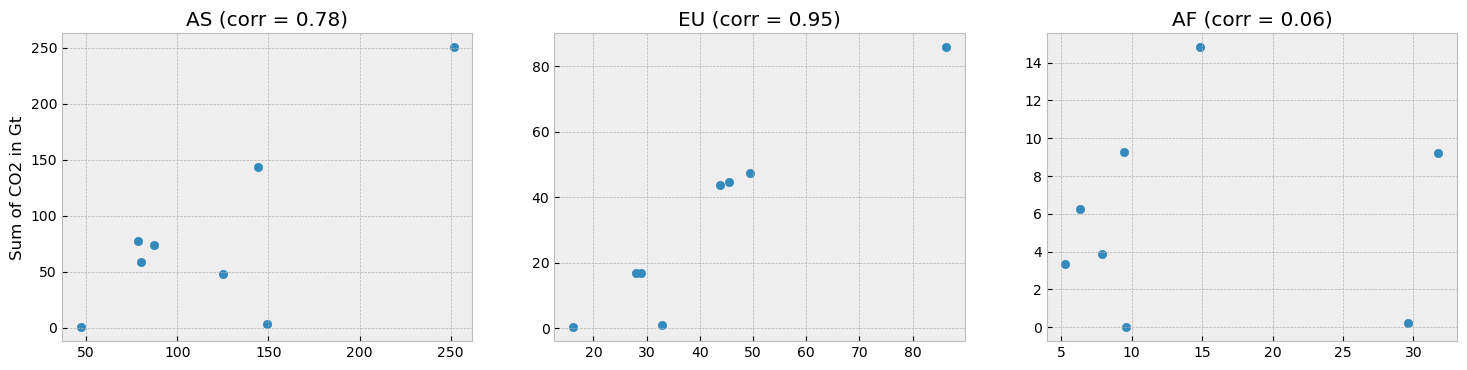

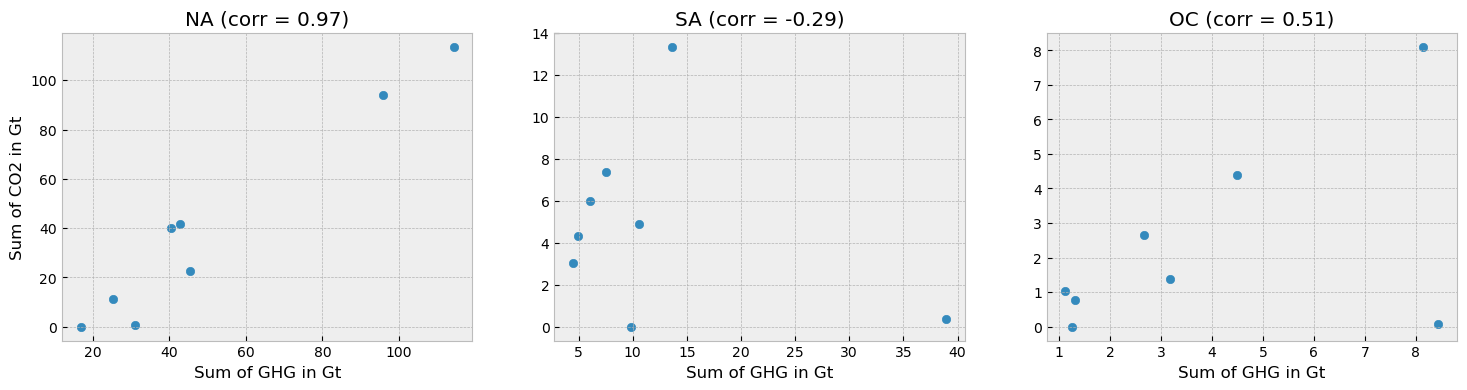

In [26]:
for i,c in enumerate(list_cont):
    if i%3 == 0:
        _,ax = plt.subplots(1,3, figsize = (18,4))
    df_st1 = df_st.loc[c]
    _ = ax[i%3].scatter(x = df_st1.iloc[:,0], y = df_st1.iloc[:,1])
    if i in [3,4,5]:
        ax[i%3].set_xlabel('Sum of GHG in Gt')
    if i in [0,3]:
        ax[i%3].set_ylabel('Sum of CO2 in Gt')
    cor = df_st1.corr().iloc[1,0]
    ax[i%3].set_title(f'{c} (corr = {cor:.2f})')

#### corr 3

In [52]:
df2['val_capita_ghg_gdp'] = df2['val_ghg'] / df2['gdp_cap'] * 1000
df2['val_capita_co2_gdp'] = df2['val_co2'] / df2['gdp_cap'] * 1000

In [66]:
f0 = ~df2.Country.isin(['EU27','GLOBAL TOTAL'])
f1 = df2.year == 2022
f2 = ~df2['gdp_gusd'].isnull()

feats = ['val_capita_ghg', 'val_capita_ghg_gdp']
feats_gr = ['Continent','Country']
df_st = df2[f0&f1&f2].groupby(feats_gr)[feats].sum().reset_index().set_index(feats_gr)

# print(df_st.shape)
# df_st[:10]

In [68]:
for c in list_cont:
    print(c)
    display(df_st.loc[c].sort_values('val_capita_ghg')[-3:])

AS


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Kuwait,37.96,3.54
Bahrain,39.29,1.63
Qatar,67.38,2.15


EU


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Luxembourg,13.69,0.07
Iceland,13.70,0.08
Gibraltar,19.68,0.01


AF


,val_capita_ghg,val_capita_ghg_gdp
Country,,
South Africa,8.91,39.75
Seychelles,12.36,0.04
Libya,15.32,5.29


NA


,val_capita_ghg,val_capita_ghg_gdp
Country,,
United States,17.90,93.80
Canada,19.79,15.19
Trinidad and Tobago,33.27,1.76


SA


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Guyana,9.75,0.22
Uruguay,11.91,1.76
Curaçao,13.06,0.10


OC


,val_capita_ghg,val_capita_ghg_gdp
Country,,
New Caledonia,19.35,0.20
Australia,21.98,11.21
Palau,61.65,0.15


In [69]:
for c in list_cont:
    print(c)
    display(df_st.loc[c].sort_values('val_capita_ghg_gdp')[-3:])

AS


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Indonesia,4.47,100.69
India,2.79,553.40
China,10.95,874.36


EU


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Poland,10.62,10.94
Germany,9.49,14.38
Ukraine,4.84,23.69


AF


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Chad,5.21,61.91
Ethiopia,1.63,77.35
Nigeria,1.88,81.50


NA


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Canada,19.79,15.19
Mexico,5.99,45.02
United States,17.90,93.80


SA


,val_capita_ghg,val_capita_ghg_gdp
Country,,
Argentina,8.27,17.09
Venezuela,4.99,34.76
Brazil,6.05,87.36


OC


,val_capita_ghg,val_capita_ghg_gdp
Country,,
New Zealand,16.83,1.77
Papua New Guinea,1.00,2.17
Australia,21.98,11.21


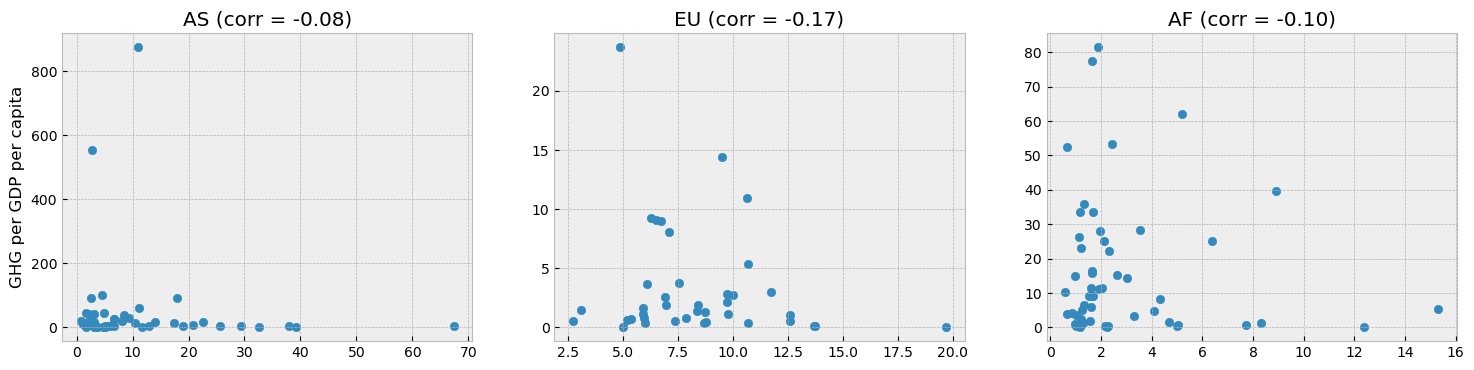

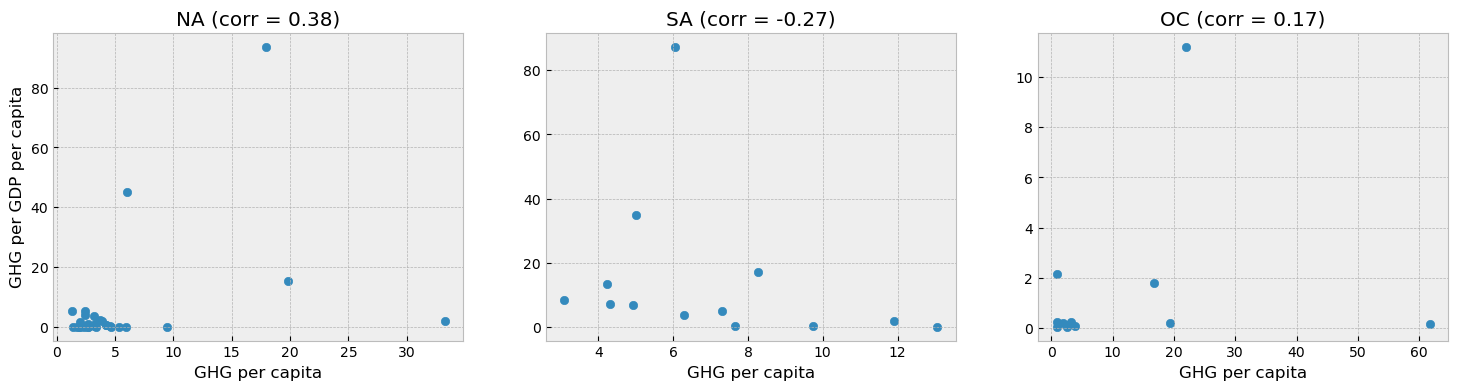

In [70]:
for i,c in enumerate(list_cont):
    if i%3 == 0:
        _,ax = plt.subplots(1,3, figsize = (18,4))
    df_st1 = df_st.loc[c]
    _ = ax[i%3].scatter(x = df_st1.iloc[:,0], y = df_st1.iloc[:,1])
    if i in [3,4,5]:
        ax[i%3].set_xlabel('GHG per capita')
    if i in [0,3]:
        ax[i%3].set_ylabel('GHG per GDP per capita')
    cor = df_st1.corr().iloc[1,0]
    ax[i%3].set_title(f'{c} (corr = {cor:.2f})')

### Population and GDP

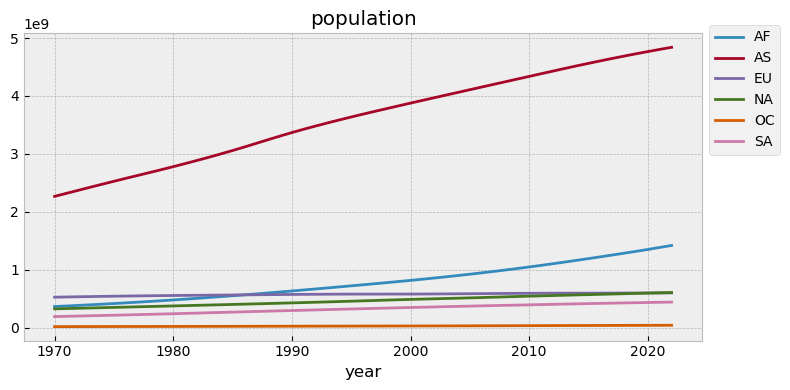

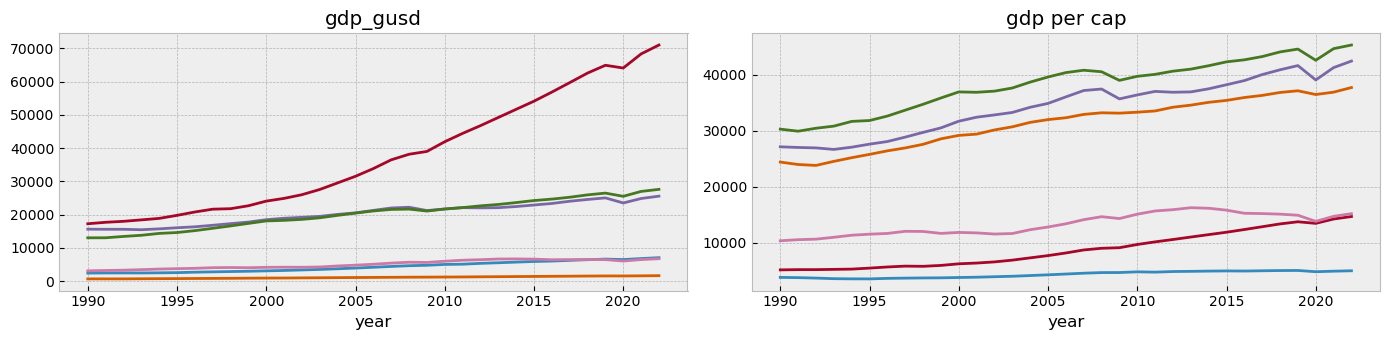

In [46]:
feats_gr = [
    'year',
    'Continent',
]
feats = ['population', 'gdp_gusd']
x = df2.groupby(feats_gr)[feats].sum().unstack()

_, ax = plt.subplots(1,1, figsize = (8,4))
p = x[feats[0]].plot(ax = ax, title = feats[0], legend = True)
_ = p.legend(bbox_to_anchor=(1., 1.05))
plt.tight_layout()
plt.show()

_, ax = plt.subplots(1,2, figsize = fsize)
p = x[feats[1]][20:].plot(ax = ax[0], title = feats[1], legend = False)

x1 = x[feats[1]]/x[feats[0]]*10**9
p = x1[20:].plot(ax = ax[1], title = 'gdp per cap', legend = False)

plt.tight_layout()
plt.show()